In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import defaultdict



In [22]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

In [23]:
feature1 = X[:,0]
feature2 = X[:,1]
classes = y

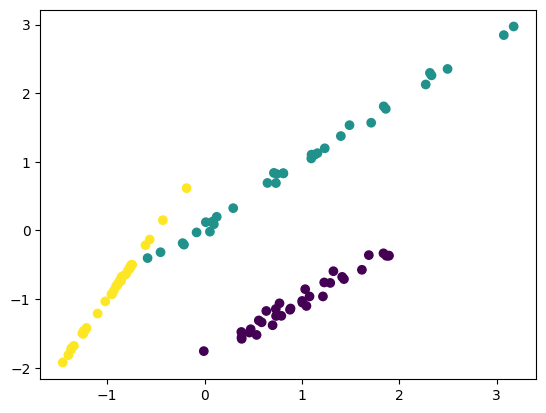

In [24]:
plt.scatter(feature1, feature2, c=classes)

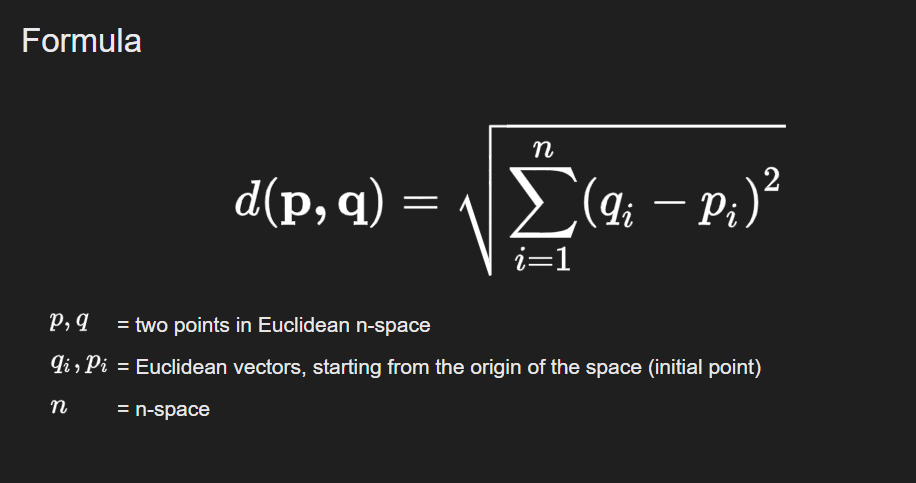

In [94]:
class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y
    self.n = len(X)

  def euclidean_distance(self, x1, y1, x2, y2):
    return np.sqrt(((x2 - x1)**2 + (y2 - y1) **2))

  def predict(self, X_pred):

    feature1 = X_pred[0]
    feature2 = X_pred[1]

    # Initialize a defaultdict with lists & extracting distances
    distances = defaultdict(list)
    for feature1_data , feature2_data , class_data in zip(self.X[:,0], self.X[:,1], self.y):
      distances[class_data].append(self.euclidean_distance(feature1, feature2, feature1_data, feature2_data))


    # Sort the distances with taking the shortest k values
    for key in distances:
      distances[key].sort()
      distances[key] = distances[key][:self.k]


    # {0: [1.7586588551871927, 1.7622755935225807, 1.768828011759522],
    #  1: [1.3418520384689177, 1.3757044281155313, 1.4092413797537826],
    #  2: [3.2079150302993034, 3.532336704223644, 3.739623161202422]}
    copy_distances = {}
    for key in distances:
      copy_distances[key] = 0

    for i in range(self.k):
      print(distances)
      current_lowest = float('inf')
      current_lowest_key = 0
      for key in distances:
        if distances[key][0] < current_lowest :
          current_lowest = distances[key][0]
          current_lowest_key = key

      copy_distances[current_lowest_key] += 1
      distances[current_lowest_key].pop(0)


    print(copy_distances)
    return max(copy_distances, key=copy_distances.get)  # return the class




d(\mathbf {p,q})= \sqrt{\sum \limits_{i=1}^n (q_i-p_i)^2

In [95]:
model = KNN(3)
model.fit(X, y)
predictions = model.predict([3,1])
print(predictions)

defaultdict(<class 'list'>, {0: [1.7586588551871927, 1.7622755935225807, 1.768828011759522], 1: [1.3418520384689177, 1.3757044281155313, 1.4092413797537826], 2: [3.2079150302993034, 3.532336704223644, 3.739623161202422]})
defaultdict(<class 'list'>, {0: [1.7586588551871927, 1.7622755935225807, 1.768828011759522], 1: [1.3757044281155313, 1.4092413797537826], 2: [3.2079150302993034, 3.532336704223644, 3.739623161202422]})
defaultdict(<class 'list'>, {0: [1.7586588551871927, 1.7622755935225807, 1.768828011759522], 1: [1.4092413797537826], 2: [3.2079150302993034, 3.532336704223644, 3.739623161202422]})
{0: 0, 1: 3, 2: 0}
1


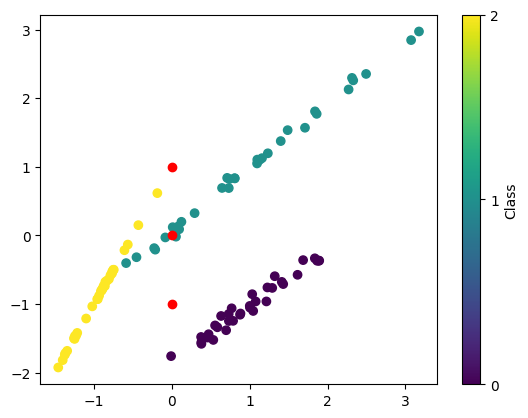

In [105]:
scatter = plt.scatter(feature1, feature2, c=classes)
# Add a colorbar with class labels
legend_labels = list(set(classes))
colorbar = plt.colorbar(scatter, ticks=legend_labels)
colorbar.set_label('Class')
colorbar.set_ticks(legend_labels)

plt.scatter(0,0, c='red')
plt.scatter(0,1, c='red')
plt.scatter(0,-1, c='red')

In [106]:
model.predict([0,0])
model.predict([0,1])
model.predict([0,-1])


defaultdict(<class 'list'>, {0: [1.3104470290297474, 1.3329792405860377, 1.3412883079891187], 1: [0.057193698276267475, 0.087217978503869, 0.1211990395545549], 2: [0.45418073696840894, 0.5793693901563465, 0.6439537373606958]})
defaultdict(<class 'list'>, {0: [1.3104470290297474, 1.3329792405860377, 1.3412883079891187], 1: [0.087217978503869, 0.1211990395545549], 2: [0.45418073696840894, 0.5793693901563465, 0.6439537373606958]})
defaultdict(<class 'list'>, {0: [1.3104470290297474, 1.3329792405860377, 1.3412883079891187], 1: [0.1211990395545549], 2: [0.45418073696840894, 0.5793693901563465, 0.6439537373606958]})
{0: 0, 1: 3, 2: 0}
defaultdict(<class 'list'>, {0: [2.070875524329879, 2.123669977963353, 2.1439277117581255], 1: [0.7153766944741075, 0.7294857236035883, 0.736085989308252], 2: [0.42547666897871445, 0.9517178132456394, 1.2652075596343235]})
defaultdict(<class 'list'>, {0: [2.070875524329879, 2.123669977963353, 2.1439277117581255], 1: [0.7153766944741075, 0.7294857236035883, 0.73

0